In [13]:
%run "header.ipynb"

# Random walk

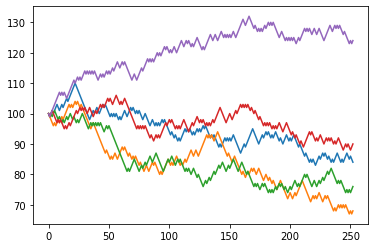

,RunNum,StepNum,Price,Step
0,0,0,100.0,NaN
1,0,1,99.0,-1.0
2,0,2,100.0,1.0
3,0,3,101.0,1.0
4,0,4,100.0,-1.0
...,...,...,...,...
1260,4,248,124.0,-1.0
1261,4,249,123.0,-1.0
1262,4,250,124.0,1.0
1263,4,251,123.0,-1.0


In [16]:
p = 0.5
Nt = 252
Nr = 5

MC('uba', Nt, Nr, S0 = 100, mu = 0, draw = 5, sigma = 1, dt = 1, returned = 'ps', p = p)

# Lognormal price process

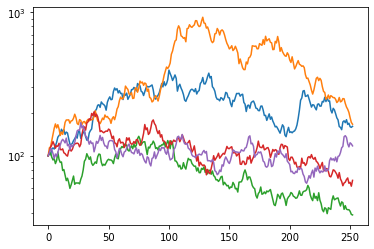

In [3]:
Ns = 252
Nr = 10000
S0 = 100
mu = 0
sigma = 1
ln = MC('ncm', Ns, Nr, S0 = S0, mu = mu, sigma = sigma, draw = 5)

In [4]:
final = ln[ln['StepNum'] == ln['StepNum'].max()]
final

,RunNum,StepNum,Price,Step,Z
252,0,252,160.518213,0.016110,0.255745
505,1,252,166.057404,-0.029296,-0.465067
758,2,252,38.745256,-0.008105,-0.128657
1011,3,252,67.450933,0.093323,1.481458
1264,4,252,117.330933,-0.030716,-0.487598
...,...,...,...,...,...
2528987,9995,252,207.850716,-0.066726,-1.059241
2529240,9996,252,150.149983,0.101307,1.608202
2529493,9997,252,57.458559,-0.049096,-0.779368
2529746,9998,252,162.361440,0.067173,1.066342


In [5]:
final.mean()

RunNum     4999.500000
StepNum     252.000000
Price       164.533376
Step          0.000270
Z             0.004294
dtype: float64

In [6]:
final.std()

RunNum     2886.895680
StepNum       0.000000
Price       217.328167
Step          0.063047
Z             1.000833
dtype: float64

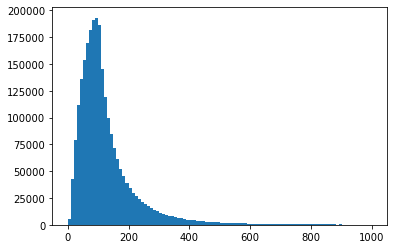

In [7]:
plt.hist(ln['Price'], bins = 100, range=[0, 1000])
plt.show()

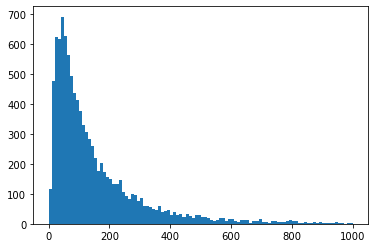

In [8]:
plt.hist(final['Price'], bins = 100, range=[0, 1000])
plt.show()

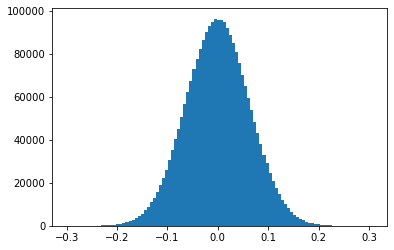

In [9]:
plt.hist(ln['Step'], bins = 100)
plt.show()

# Simulating AR(1) process

In [ ]:
rnd.RandomState().normal(0, 1, [3,2])

In [ ]:
def MC_AR1(Nt, Nr, lmbd = 0.4, sigma = 0.3, mu = 0.1, dt = 1/252):

    epsilon = rnd.RandomState().normal(0, sigma*np.sqrt(dt), [Nt, Nr])
    R = np.zeros([Nt+1, Nr])
    P = np.ones([Nt+1, Nr])

    for t in range(1, Nt+1):
        R[t,:] = (1+lmbd)*mu*dt - lmbd*R[t-1,:] + epsilon[t-1,:]
        P[t,:] = P[t-1,:] * np.exp(R[t,:])
    
    return R, P

In [ ]:
Nt = 252
Nr = 1

lmbd = 0.4
sigma = 0.3
mu = 0.1
dt = 1/252

R, P = MC_AR1(Nt, Nr, lmbd = lmbd, sigma = sigma, mu = mu, dt = dt)

In [ ]:
for run in range(Nr):
    plt.plot(P[:,run])

In [ ]:
acf = np.zeros([Nt+1, Nr])

x_ovrflw = int(np.ceil(min(10 * np.log10(Nt+1), Nt+1)))
x = range(x_ovrflw)

y = np.power(-lmbd, x)# * np.square(sigma) / (1 - np.square(lmbd))

for run in range(Nr):
    acf[:x_ovrflw,run] = stattools.acf(np.log(1+R[:,run])).transpose()
    plt.figure()
    plt.scatter(x, acf[:x_ovrflw,run])
    plt.scatter(x, y)
    plt.axhline(0)
    plt.show()